In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation ,Flatten, Conv2D, MaxPooling2D
import pickle
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
mnist = tf.keras.datasets.mnist
(x1,y_train),(x2,y_test) = mnist.load_data()

x_train_ann , x_test_ann = x1/255.0 , x2/255.0
x_train_cnn , x_test_cnn = np.expand_dims(x_train_ann , axis = -1) , np.expand_dims(x_test_ann , axis = -1)

print(x_train_ann.shape, x_test_ann.shape)

(60000, 28, 28) (10000, 28, 28)


ANN Model

In [ ]:
#ANN

model_ann = tf.keras.models.Sequential()
model_ann.add(tf.keras.layers.Flatten())
model_ann.add(tf.keras.layers.Dense(64 , activation = tf.keras.activations.relu))
model_ann.add(tf.keras.layers.Dense(64 , activation = tf.keras.activations.relu))
model_ann.add(tf.keras.layers.Dense(10 , activation = tf.keras.activations.softmax))



In [ ]:
model_ann.compile(optimizer = 'adam' ,
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
history_ann = model_ann.fit(x_train_ann,y_train,epochs=3, validation_data=(x_test_ann, y_test))

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4773 - accuracy: 0.8654 - val_loss: 0.1502 - val_accuracy: 0.9538
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1302 - accuracy: 0.9597 - val_loss: 0.1042 - val_accuracy: 0.9673
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0899 - accuracy: 0.9736 - val_loss: 0.0944 - val_accuracy: 0.9700


In [ ]:
train_loss_ann = history_ann.history['loss']
test_loss_ann = history_ann.history['val_loss']

epoch_count_ann = range(1, len(train_loss_ann) + 1)

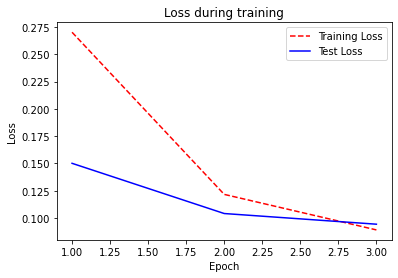

In [ ]:
plt.plot(epoch_count_ann, train_loss_ann, 'r--')
plt.plot(epoch_count_ann, test_loss_ann, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss during training')
plt.show();

CNN Model

In [ ]:
#CNN

input = tf.keras.layers.Input(shape = (28 , 28 , 1))
c = Conv2D(32 , (3,3) , padding = 'valid', activation= tf.nn.relu)(input)
m = MaxPooling2D((2,2) , (2,2))(c)
c1 = Conv2D(64 , (3,3) , padding = 'valid', activation= tf.nn.relu)(m)
m1 = MaxPooling2D((2,2) , (2,2))(c1)
f = Flatten()(m1)
output = Dense(units = 10, activation= tf.nn.softmax)(f)

In [ ]:
model_cnn = tf.keras.models.Model(input , output)
model_cnn.summary()
model_cnn.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1601

In [ ]:
history_cnn = model_cnn.fit(x_train_cnn, y_train , epochs = 3)
test_loss_cnn , test_accuracy_cnn = model_cnn.evaluate(x_test_cnn, y_test)
print('Test Loss , Accuracy = ' , test_loss_cnn, test_accuracy_cnn)

Epoch 1/3
1875/1875 [==============================] - 54s 28ms/step - loss: 0.3601 - accuracy: 0.8911
Epoch 2/3
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0577 - accuracy: 0.9820
Epoch 3/3
313/313 [==============================] - 3s 9ms/step - loss: 0.0323 - accuracy: 0.9892
Test Loss , Accuracy =  0.03233589604496956 0.9891999959945679


In [ ]:
import pandas as pd

In [ ]:
ann_acc = history_ann.history['accuracy'][-1]
cnn_acc = history_cnn.history['accuracy'][-1]
ann_loss = history_ann.history['loss'][-1]
cnn_loss = history_cnn.history['loss'][-1]

results = pd.DataFrame(data = [[ann_acc , ann_loss] , [ cnn_acc , cnn_loss]] ,columns = ['Accuracy' , 'Loss'] , index = ['ANN' , 'CNN'])

In [ ]:
results

,Accuracy,Loss
ANN,0.973233,0.089166
CNN,0.987650,0.039261


Hence CNN has more accuracy and less loss compared to ANN.